# Loading JSON data into 5000 x 32 x 32 dataset

In [1]:
import json
import os
import numpy as np

In [2]:
print(os.getcwd())
data = []
for line in open('../thermal_raw_20210507_full/20210507_1605_3078.txt', 'r'):
    data.append(np.array(json.loads(line)['data']))
# with open('thermal_raw_20210507_full/20210507_1605_3078.txt') as f:
#   data = json.load(f)

g:\My Drive\1. EIT Digital master\Estland\Semester 1\ML for ES\ias0360-final-project\scripts


In [4]:
print(data[1][1])
print(len(data[1][1]))
print(data[1].shape)

[12.  11.5 11.1 10.7 11.4 12.3 12.1 11.6 11.7 12.5 11.8 12.6 12.7 12.3
 12.7 12.5 12.7 13.2 13.5 13.1 13.  12.1 12.2 13.  13.6 11.6 11.4 12.7
 13.3 11.5 11.2 11.5]
32
(32, 32)


In [5]:
dataset = np.asarray(data)

In [6]:
dataset.shape

(5000, 32, 32)

# Flattening the data into (5000, 32*32)

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

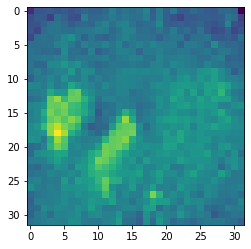

In [36]:
plt.imshow(dataset[3200])

In [8]:
new_ds = dataset 

In [9]:
pixels = new_ds.flatten(order='C').reshape(5000, 32*32)

In [10]:
print(pixels[0][0:32])

[10.5 10.6 11.7 12.3 11.2 12.2 11.9 11.6 11.1 13.2 12.4 11.9 12.1 12.5
 12.7 12.4 12.7 12.3 13.4 13.7 12.9 13.3 12.7 12.  12.9 12.7 10.5 13.7
 12.3 12.  11.9 11.3]


In [11]:
new_ds[0][0]

array([10.5, 10.6, 11.7, 12.3, 11.2, 12.2, 11.9, 11.6, 11.1, 13.2, 12.4,
       11.9, 12.1, 12.5, 12.7, 12.4, 12.7, 12.3, 13.4, 13.7, 12.9, 13.3,
       12.7, 12. , 12.9, 12.7, 10.5, 13.7, 12.3, 12. , 11.9, 11.3])

In [10]:
pixels[0][0:32] == new_ds[0][0]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True])

In [11]:
pixels.shape

(5000, 1024)

# Dimensionality reduction

In [12]:
from sklearn.decomposition import PCA

In [114]:

pca = PCA(n_components= 0.8) # explained variability
converted_data = pca.fit_transform(pixels)
 
converted_data.shape

(5000, 1017)

In [13]:
pca = PCA(n_components= 2) # we need 2 principal components to plot.
converted_data = pca.fit_transform(pixels)
 
print(converted_data.shape)
print(pca.explained_variance_ratio_)
print(sum(pca.explained_variance_ratio_))


(5000, 2)

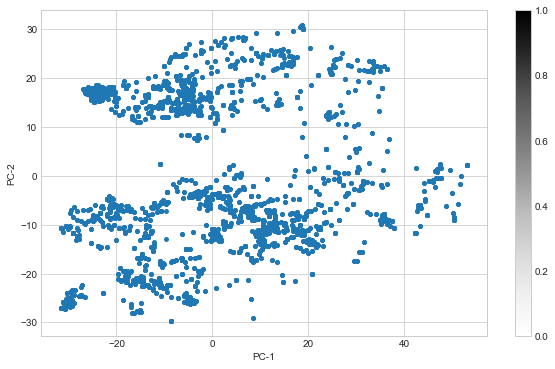

In [14]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize = (10,6))
c_map = plt.cm.get_cmap('jet', 10)
plt.scatter(converted_data[:, 0], converted_data[:, 1], s = 15,
            cmap = c_map)
plt.colorbar()
plt.xlabel('PC-1') , plt.ylabel('PC-2')
plt.show()

In [25]:
pca = PCA(n_components= 2)
converted_data = pca.fit_transform(pixels)
 
converted_data.shape

(5000, 33)

# Clustering

In [15]:
import numpy as np

from sklearn.cluster import DBSCAN
from sklearn import metrics

In [21]:
# Compute DBSCAN
db = DBSCAN(eps=4, min_samples=20).fit(converted_data)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print("Silhouette Coefficient: %0.3f" % metrics.silhouette_score(converted_data, labels))

Estimated number of clusters: 5
Estimated number of noise points: 88
Silhouette Coefficient: 0.161


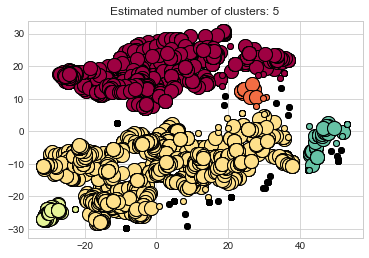

In [22]:
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = labels == k

    xy = converted_data[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14,
    )

    xy = converted_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6,
    )

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()